# Wine Classification

In [25]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Data feature check

In [26]:
wine = load_wine()

In [27]:
# check what kind of data is in
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [28]:
# data value check
wine.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [29]:
# meaning of each data
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# Data label balance check

In [30]:
# total label count
len(wine.target)

178

In [31]:
unique,counts=np.unique(wine.target,return_counts=True)

In [32]:
# check each label counts
dict(zip(unique,counts))

{0: 59, 1: 71, 2: 48}

In [33]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [34]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

# Data split

In [35]:
x_train,x_test,y_train, y_test = train_test_split(wine.data, wine.target,
                                                 test_size=0.2,random_state=1)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Decision Tree

In [37]:
start= time.time()
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)
tree_pred = d_tree.predict(x_test)
print(accuracy_score(y_test, tree_pred))
d_report = classification_report(y_test, tree_pred)
d_time = time.time()-start

0.9166666666666666


# Random Forest

In [38]:
start= time.time()
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
r_pred = r_forest.predict(x_test)
print(accuracy_score(y_test, r_pred))
r_report = classification_report(y_test, r_pred)
r_time = time.time()-start

0.9722222222222222


# Support Vector Machine

In [39]:
start= time.time()
sv_machine = svm.SVC()
sv_machine.fit(x_train,y_train)
s_pred = sv_machine.predict(x_test)
print(accuracy_score(y_test, s_pred))
s_report = classification_report(y_test, s_pred)
s_time = time.time()-start

0.6388888888888888


# Stochastic Gradient Descent

In [40]:
start= time.time()
sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train,y_train)
sgd_pred = sgd_classifier.predict(x_test)
print(accuracy_score(y_test, sgd_pred))
sgd_report = classification_report(y_test, sgd_pred)
sgd_time = time.time()-start

0.5


# Logistic Regression

In [41]:
start= time.time()
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)
logistic_pred = logistic_regression.predict(x_test)
print(accuracy_score(y_test, logistic_pred))
logistic_report = classification_report(y_test, logistic_pred)
logistic_time = time.time()-start

0.9444444444444444


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


위에 ConvergenceWarning 메세지에 의거해서 시도를 해보고자 구글링을 함
max_iter 입력에도 불구하고 메세지가 달라지지 않아서 StandardScaler를 통해
데이터를 스케일링 시도함

# Scaled Logistic Regression

In [42]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)
start= time.time()
scaled_logistic_regression = LogisticRegression(max_iter=1000)
scaled_logistic_regression.fit(scaled_x_train, y_train)
scaled_logistic_pred = scaled_logistic_regression.predict(scaled_x_test)
scaled_logistic_report = classification_report(y_test, logistic_pred)
scaled_logistic_time = time.time()-start

In [43]:
algorithm_name = ['decision_tree','random_forest','svm','sgd_classifier','logistic_regression','scaled_logistic_regression']
accuracy = [accuracy_score(y_test, tree_pred),accuracy_score(y_test, r_pred),accuracy_score(y_test, s_pred),accuracy_score(y_test, sgd_pred),accuracy_score(y_test, logistic_pred),accuracy_score(y_test,scaled_logistic_pred)]
report = [d_report,r_report,s_report,sgd_report,logistic_report,scaled_logistic_report]
all_time = [d_time,r_time,s_time,sgd_time,logistic_time, scaled_logistic_time]

# Result

In [44]:
import pandas as pd
df = pd.DataFrame(index=algorithm_name)
df['report'] = report
df['accuracy'] = accuracy
df['time'] = all_time
df.sort_values('accuracy',ascending=False, inplace=True)

In [45]:
df

,report,accuracy,time
scaled_logistic_regression,precision recall f1-score ...,1.000000,0.016910
random_forest,precision recall f1-score ...,0.972222,0.121830
logistic_regression,precision recall f1-score ...,0.944444,0.226363
decision_tree,precision recall f1-score ...,0.916667,0.006318
svm,precision recall f1-score ...,0.638889,0.006558
sgd_classifier,precision recall f1-score ...,0.500000,0.007403


In [46]:
df.report

scaled_logistic_regression                  precision    recall  f1-score   ...
random_forest                               precision    recall  f1-score   ...
logistic_regression                         precision    recall  f1-score   ...
decision_tree                               precision    recall  f1-score   ...
svm                                         precision    recall  f1-score   ...
sgd_classifier                              precision    recall  f1-score   ...
Name: report, dtype: object

In [47]:
print(df.report[0],'\n' ,df.report[1], '\n', df.report[2],'\n', df.report[3])

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.87      1.00      0.93        13
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36
 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36
 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.87      1.00      0.93        13
           2       1.00      0.89      0.94         9

    accuracy    

# 번외
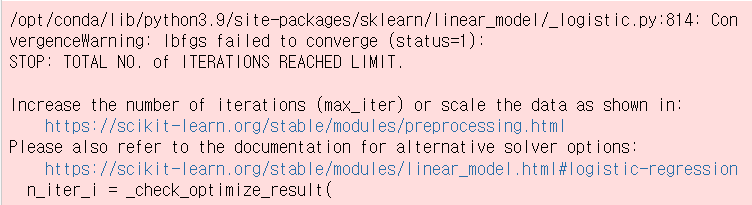

로지스틱회귀에서 위와 같은 메시지가 발생하였음
max_iter를 올려줬지만 그럼에도 불구하고 발생하는걸로 보아
자료의 표준화가 필요해보여서 하는 시도

와인데이터분류에서 겪었던 일로 Decision Tree와 Random Forest의 정확도 값이 소수점까지 똑같이 나오는 현상이 있었다
버그인가 싶어 report를 살펴본 결과 살짝 다른 결과들이 있어서 다행히 코드상의 문제점은 없는 것을 확인하였지만
확인차 조원 및 퍼실님께 확인을 받았었다
그러던 중 data를 split 해보는 곳에서 random state를 바꿔봐야겠단 생각이 들었고
0에서 1로 바꾸니 결과가 달라졌다
결과가 의심스러울 땐 데이터 섞기를 통해서 다시 확인해보자!